## Here I play with datasets.

##### Import libraries required

In [77]:
# Pyplot
import matplotlib.pyplot as plt
%pylab inline

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
# from sklearn.model_selection import KFold

# Metrics
from sklearn.metrics import accuracy_score

Populating the interactive namespace from numpy and matplotlib


In [78]:
# Dataset
from sklearn.datasets import load_digits
data = load_digits()

Now, we should take a look at our piece of data. We can do it in different ways, sometimes it's even required, so be free to modify the next cell.

In [79]:
print(data['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [80]:
print(data)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [81]:
print(data.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

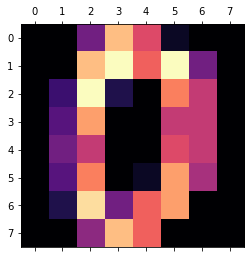

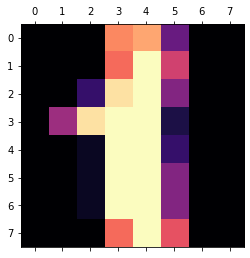

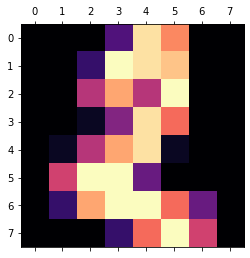

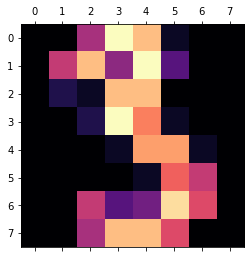

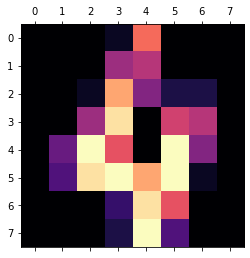

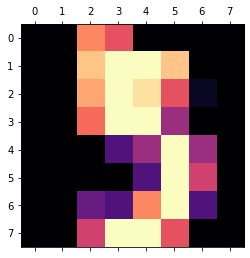

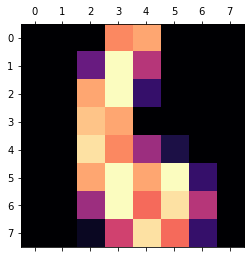

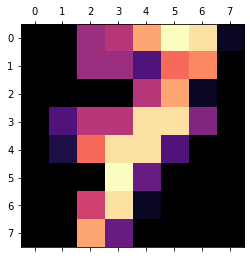

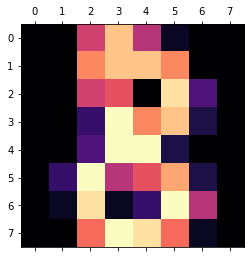

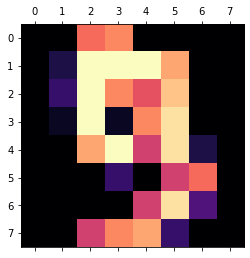

In [82]:
# Image processing via matplotlib
plt.magma() #Cool, gray, copper, bone, autumn, hot, magma
for i in range(0, 10):
    plt.matshow(data.images[i])
    plt.show()

So when we have taken a look at that boi we are ready to go!

First, we need to prepare data on which our KNN machine will study on. I do it using train_test_split.

In [83]:
# Questions
X = data.data
# Answers
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Then, we create our student and give him theory to eat. 

In [84]:
# Create KNeighborsClassifier object
knn_machine = KNeighborsClassifier(
    n_neighbors=20, 
    weights='uniform',
    p=2,
    n_jobs=-1
)

In [85]:
# Give him a book
knn_machine.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                     weights='uniform')

That's it. Our boy is now ready to shine! Let's try providing him with new data!

3
[[ 0.  1. 10. 15. 16. 13.  3.  0.]
 [ 0.  5. 14.  5.  5. 15.  8.  0.]
 [ 0.  0.  0.  0.  2. 15.  6.  0.]
 [ 0.  0.  0.  0.  9. 16.  0.  0.]
 [ 0.  0.  0.  0.  9. 16.  0.  0.]
 [ 0.  0.  0.  0.  4. 16.  6.  0.]
 [ 0.  0.  2.  3. 13. 12.  0.  0.]
 [ 0.  0. 15. 13.  7.  0.  0.  0.]]


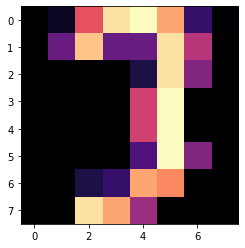

In [93]:
# Check first answer
i = 1
print(y_test[i])
print(X_test[i].reshape(8,8))
plt.imshow(X_test[i].reshape(8,8), interpolation='nearest')
plt.show()

In [94]:
# Check boy's answer
knn_machine.predict(X_test[i].reshape(1,-1))

array([3])

After test prediction, it's good to make accuracy check on whole test data.

In [96]:
accuracy_score(y_test, knn_machine.predict(X_test))

0.9733333333333334

Still, I don't know how to get this thingy up and running, which makes it a bit unusable. 
But, I think that shouldn't be a hard thingy to fix.